# Import the necessary libraries

In [91]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

import plotly.express as px

from matplotlib import style

style.use('ggplot')
# plt.style.use('seaborn')
# plt.style.use('Solarize_Light2')



import re

from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

# Load the CSV file of IMDB Dataset

In [92]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [93]:
df.shape

(50000, 2)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# Plot the graph for total review sentiment(Positive & Negative"

Text(0.5, 1.0, 'Sentiment distribution')

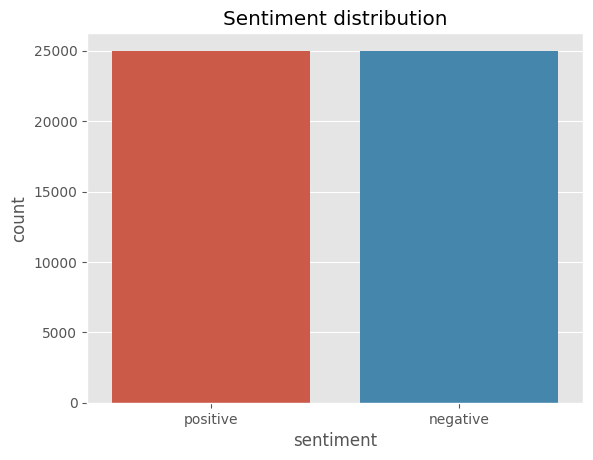

In [95]:
sns.countplot(x='sentiment', data=df)

plt.title("Sentiment distribution")

# Creating a New Column for Review Length and Box Plot

In this section, we will create a new column to represent the length of each review and visualize the distribution of review lengths across different sentiments using a box plot.


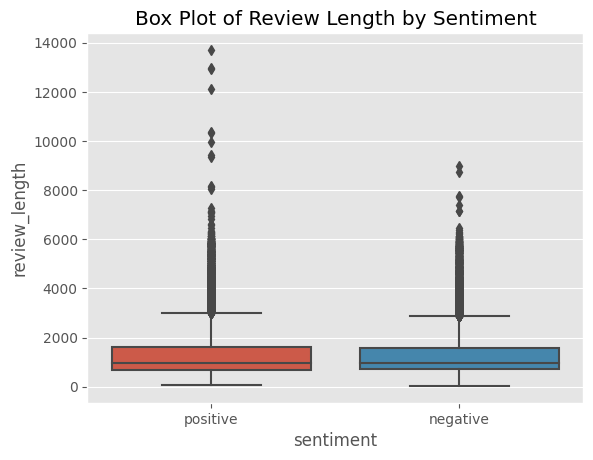

In [96]:
# Create a new column for review length
df['review_length'] = df['review'].apply(len)

# Create the box plot
sns.boxplot(x='sentiment', y='review_length', data=df)

# Adding a title for the box plot
plt.title("Box Plot of Review Length by Sentiment")
plt.show()

### Displaying the First 5 Reviews with Sentiment

The following code iterates through the first 5 reviews in the dataset, printing the review and its corresponding sentiment:


In [97]:
for i in range(5):

    print("Review: ", [i])

    print(df['review'].iloc[i], "\n")

    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

# Function to Count the Number of Words in a Given Text

This function takes a string as input and returns the number of words in the text by splitting it based on spaces.


In [98]:
def no_of_words(text):

    words= text.split()

    word_count = len(words)

    return word_count

### Calculating Word Count for Each Review


In [99]:
df['word count'] = df['review'].apply(no_of_words)

In [100]:
df.head()

,review,sentiment,review_length,word count
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230


### Word Count Distribution by Sentiment

The following plot shows the distribution of word counts in reviews, separated by positive and negative sentiments. The blue bars represent reviews with positive sentiment, and the red bars represent reviews with negative sentiment.


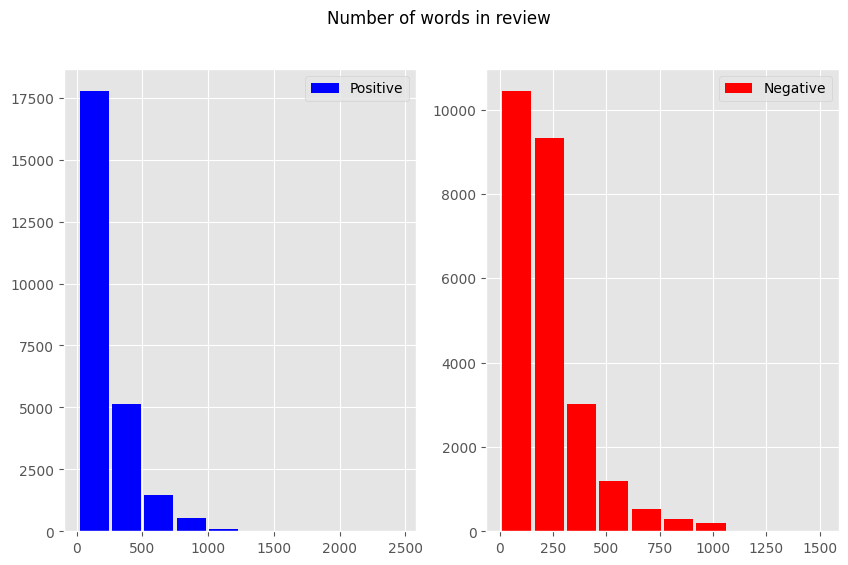

In [101]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);

ax[0].legend(loc='upper right');

ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);

ax[1].legend(loc='upper right');

fig.suptitle("Number of words in review")

plt.show()

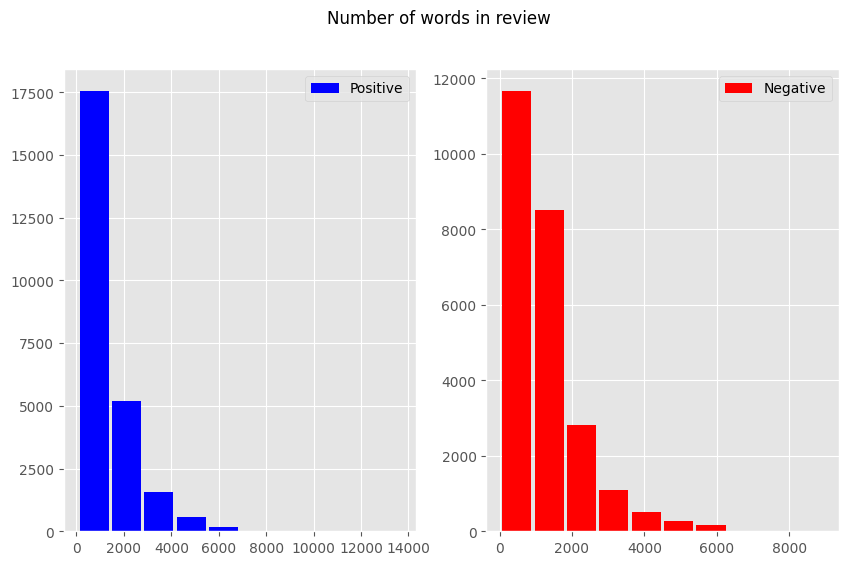

In [102]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);

ax[0].legend(loc='upper right');

ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);

ax[1].legend(loc='upper right');

fig.suptitle("Number of words in review")

plt.show()

### Replacing Sentiment Values

The code snippet below replaces the string values in the `sentiment` column with numerical values for easier analysis:


In [103]:
df.sentiment.replace("positive", 1, inplace=True)

df.sentiment.replace("negative", 2, inplace=True)

In [104]:
df.head()

,review,sentiment,review_length,word count
0,One of the other reviewers has mentioned that ...,1,1761,307
1,A wonderful little production. <br /><br />The...,1,998,162
2,I thought this was a wonderful way to spend ti...,1,926,166
3,Basically there's a family where a little boy ...,2,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,230


# Data Preprocessing Function

This function performs the following preprocessing steps on text data:
- Converts all text to lowercase
- Removes `<br />` tags
- Removes URLs
- Removes `@` and `#` symbols
- Removes punctuation
- Tokenizes the text
- Filters out stop words

The function returns a cleaned, tokenized version of the input text.


In [105]:
def data_processing(text):

    text= text.lower()

    text = re.sub('<br />', '', text)

    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)

    text = re.sub(r'\@w+|\#', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    text_tokens = word_tokenize(text)

    filtered_text = [w for w in text_tokens if not w in stop_words]

    return " ".join(filtered_text)

# Data Processing with apply() Method


In [106]:
df.review = df['review'].apply(data_processing)

### Number of Duplicate Entries



In [107]:
duplicated_count = df.duplicated().sum()

print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  419


In [108]:
df = df.drop_duplicates('review')

### Stemming Function

The following function applies stemming to a list of words using the **Porter Stemmer**. Stemming is a process of reducing words to their base or root form. The Porter Stemmer is one of the most commonly used stemming algorithms, designed to remove common morphological and inflectional endings from words. This helps to reduce different forms of a word (like "running," "runs," and "ran") to a common base form ("run").


In [109]:
stemmer = PorterStemmer()

def stemming(data):

    text = [stemmer.stem(word) for word in data]

    return data

### Applying Stemming to Reviews

In this section, we apply stemming to the **'review'** column to reduce words to their root form using the **Porter Stemmer**. Stemming helps normalize word variations (e.g., "running," "runs," "ran" become "run"), improving the efficiency of text analysis tasks like sentiment analysis.


In [110]:
df.review = df['review'].apply(lambda x: stemming(x))

## Word Count Feature Creation

In this section, we create a new column called `word count` by applying a custom function `no_of_words` to each review in the `review` column. This helps in analyzing the length of reviews, which can be useful for understanding patterns or trends in the text data.


In [111]:
df['word count'] = df['review'].apply(no_of_words)

df.head()

,review,sentiment,review_length,word count
0,one reviewers mentioned watching 1 oz episode ...,1,1761,168
1,wonderful little production filming technique ...,1,998,84
2,thought wonderful way spend time hot summer we...,1,926,86
3,basically theres family little boy jake thinks...,2,748,67
4,petter matteis love time money visually stunni...,1,1317,125


In [112]:
pos_reviews =  df[df.sentiment == 1]

pos_reviews.head()

,review,sentiment,review_length,word count
0,one reviewers mentioned watching 1 oz episode ...,1,1761,168
1,wonderful little production filming technique ...,1,998,84
2,thought wonderful way spend time hot summer we...,1,926,86
4,petter matteis love time money visually stunni...,1,1317,125
5,probably alltime favorite movie story selfless...,1,656,58


## Word Cloud of Most Frequent Words in Positive Reviews
This code generates a word cloud of the most frequent words found in positive reviews. By visualizing the most common words, we can gain insights into recurring themes and sentiments in the reviews. The word cloud highlights the most prominent words based on their frequency of occurrence.


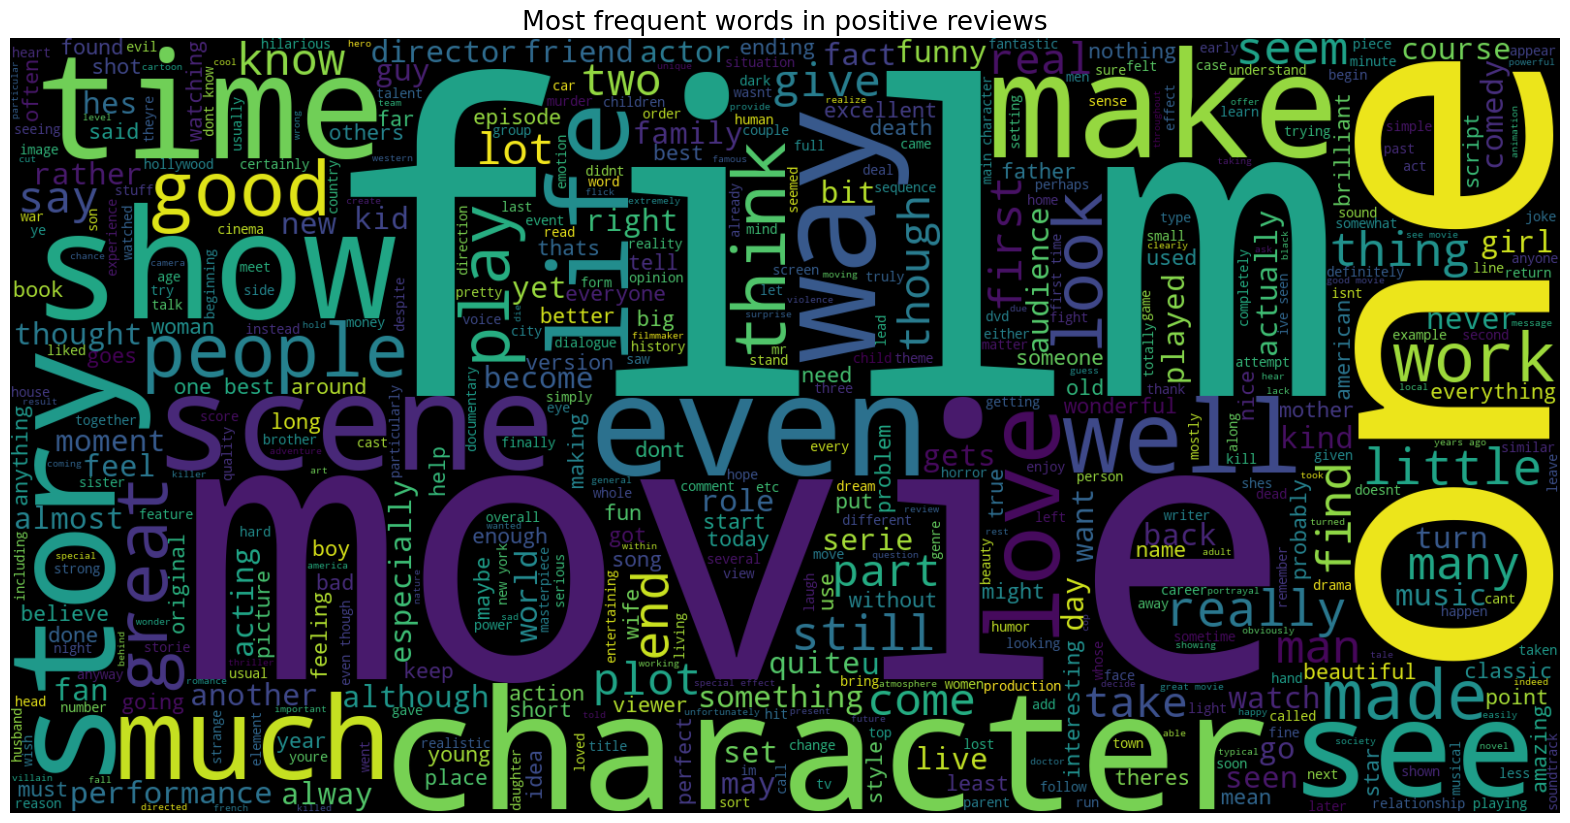

In [113]:
text = ' '.join([word for word in pos_reviews['review']])

plt.figure(figsize=(20,15), facecolor='None')

wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.title('Most frequent words in positive reviews', fontsize = 19)

plt.show()

## Word Frequency Analysis of Positive Reviews
The purpose of this code is to analyze the most frequent words used in positive reviews. By utilizing Python's `Counter` from the `collections` module, we iterate through each review, split the text into individual words, and count their occurrences. Finally, the 15 most common words are displayed to help identify key terms frequently mentioned in positive reviews, providing insights into customer sentiments.


### Top 15 Most Common Words in Positive Sentiment Text
The following code generates a DataFrame of the 15 most common words found in positive sentiment text. It uses the `most_common()` method from the `collections.Counter` to count word frequencies, and then stores these values in a DataFrame with 'word' and 'count' as column headers for easy visualization.


In [114]:
from collections import Counter

count = Counter()

for text in pos_reviews['review'].values:

    for word in text.split():

        count[word] +=1

count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [115]:
pos_words = pd.DataFrame(count.most_common(15))

pos_words.columns = ['word', 'count']

pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


## Visualization of Common Words in Positive Reviews

The following bar chart visualizes the most common words found in positive reviews, along with their respective counts. Each word is displayed on the vertical axis, and its frequency (count) is on the horizontal axis. Different colors are used to distinguish between the words for better readability.


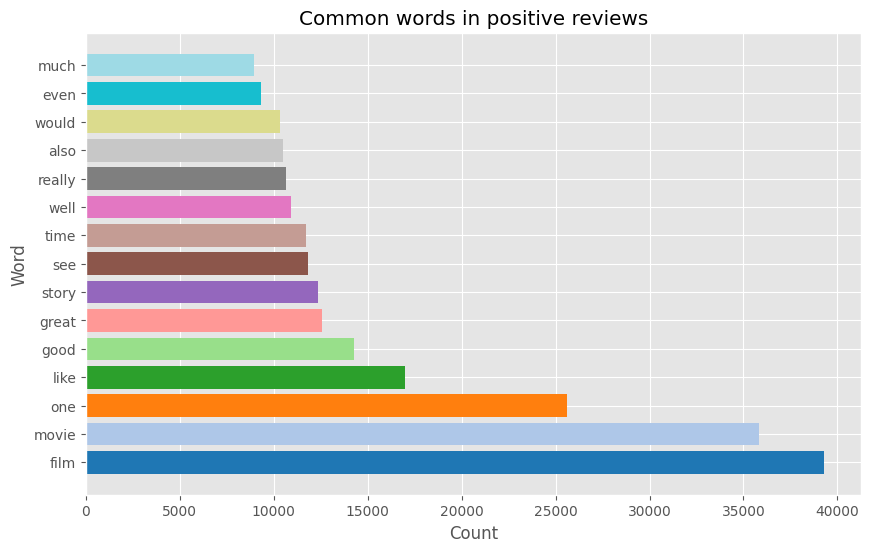

In [116]:
import matplotlib.pyplot as plt


colors = plt.cm.get_cmap('tab20', len(pos_words))  

plt.figure(figsize=(10, 6))
plt.barh(pos_words['word'], pos_words['count'], color=colors(np.arange(len(pos_words))))

plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Common words in positive reviews')
plt.show()


In [117]:
neg_reviews =  df[df.sentiment == 2]

neg_reviews.head()

,review,sentiment,review_length,word count
3,basically theres family little boy jake thinks...,2,748,67
7,show amazing fresh innovative idea 70s first a...,2,934,83
8,encouraged positive comments film looking forw...,2,681,64
10,phil alien one quirky films humour based aroun...,2,578,51
11,saw movie 12 came recall scariest scene big bi...,2,937,84


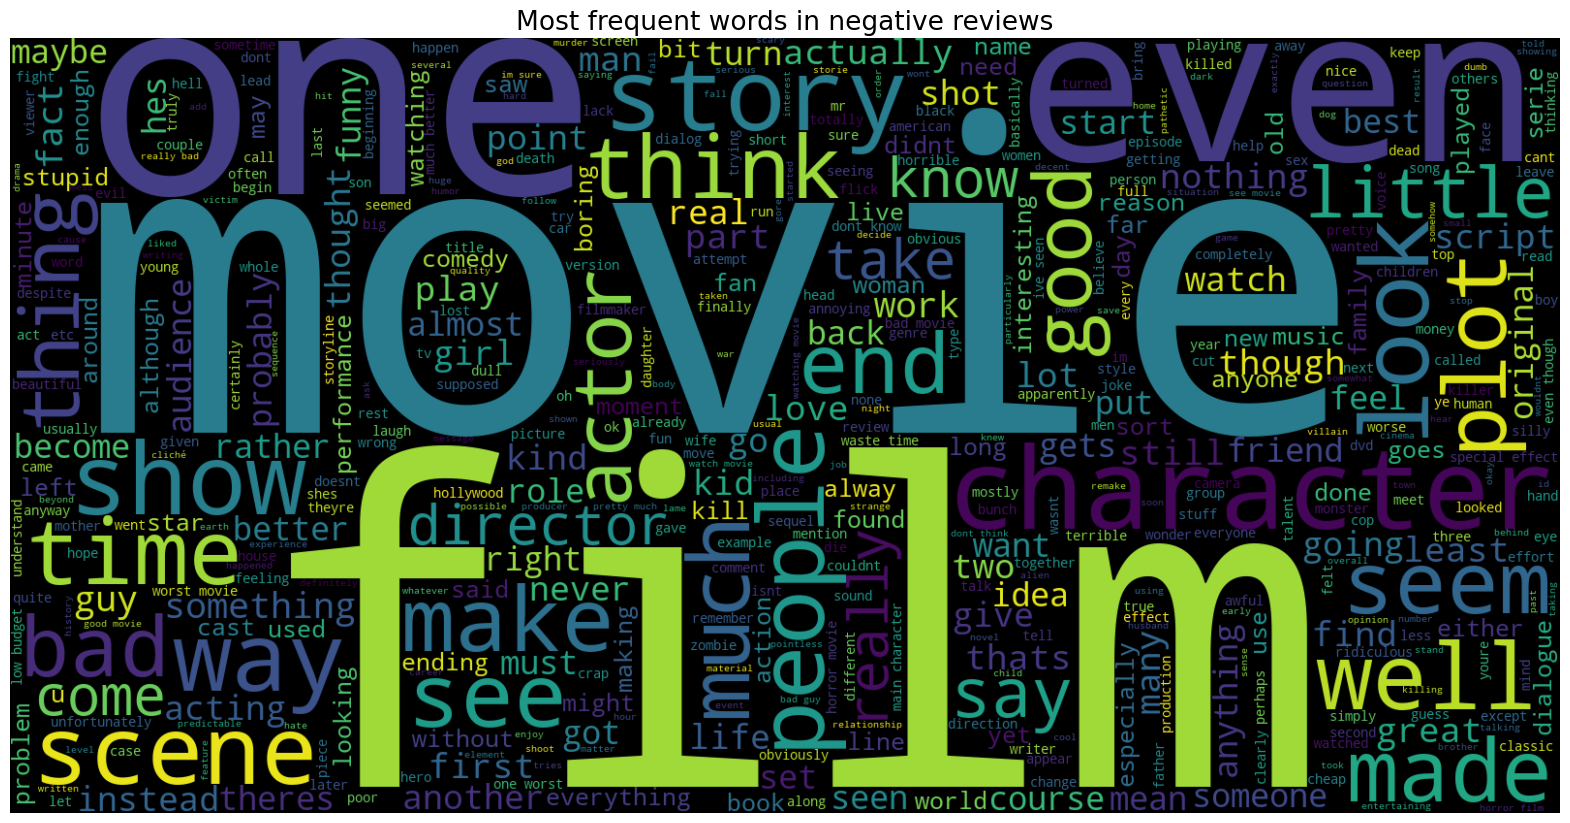

In [118]:
text = ' '.join([word for word in neg_reviews['review']])

plt.figure(figsize=(20,15), facecolor='None')

wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.title('Most frequent words in negative reviews', fontsize = 19)

plt.show()

In [119]:


count = Counter()

for text in neg_reviews['review'].values:

    for word in text.split():

        count[word] +=1

count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [120]:
neg_words = pd.DataFrame(count.most_common(15))

neg_words.columns = ['word', 'count']

neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [121]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


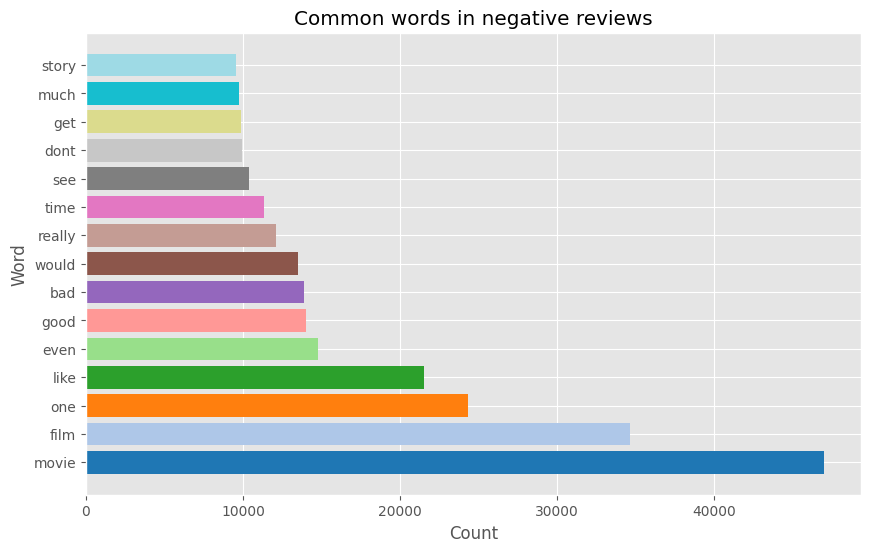

In [122]:
import matplotlib.pyplot as plt


colors = plt.cm.get_cmap('tab20', len(neg_words))  

plt.figure(figsize=(10, 6))
plt.barh(neg_words['word'], neg_words['count'], color=colors(np.arange(len(neg_words))))

plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Common words in negative reviews')
plt.show()


In [123]:
X = df['review']

Y = df['sentiment']

### Vectorizing Text Data Using TfidfVectorizer

We use `TfidfVectorizer` to transform the textual data from the `review` column into numerical features, which are used for machine learning models.


In [124]:
vect = TfidfVectorizer()

X = vect.fit_transform(df['review'])

### Train-Test Split
Splitting the dataset into training (70%) and testing (30%) sets with a fixed random state for reproducibility.


In [125]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [126]:
print("Size of x_train: ", (x_train.shape))

print("Size of y_train: ", (y_train.shape))

print("Size of x_test: ", (x_test.shape))

print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


## Importing essential libraries

In [127]:
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings

warnings.filterwarnings('ignore')

# Logistic Regression Model for Classification

This code snippet demonstrates the implementation of a Logistic Regression model to classify the data, followed by evaluating its accuracy on the test set.


In [128]:
logreg = LogisticRegression()

logreg.fit(x_train, y_train)

logreg_pred = logreg.predict(x_test)

logreg_acc = accuracy_score(logreg_pred, y_test)

print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.00%


## Model Performance Evaluation

This section displays the confusion matrix and the classification report to evaluate the performance of the logistic regression model on the test set.


In [129]:
print(confusion_matrix(y_test, logreg_pred))

print("\n")

print(classification_report(y_test, logreg_pred))

[[6785  728]
 [ 908 6453]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



# Multinomial Naive Bayes Classifier

This notebook demonstrates the use of a Multinomial Naive Bayes classifier to predict categories based on feature data, evaluating its performance using test accuracy.


In [130]:
mnb = MultinomialNB()

mnb.fit(x_train, y_train)

mnb_pred = mnb.predict(x_test)

mnb_acc = accuracy_score(mnb_pred, y_test)

print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.44%


## Confusion Matrix and Classification Report(MNB)

The confusion matrix and classification report provide insight into the model's performance by showing the number of correct and incorrect predictions, as well as precision, recall, F1-score, and support for each class.


In [131]:
print(confusion_matrix(y_test, mnb_pred))

print("\n")

print(classification_report(y_test, mnb_pred))

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



## Linear Support Vector Classifier (SVC)

Training and evaluating a Linear Support Vector Classifier (SVC) model for binary classification. Below, we fit the model, predict on the test set, and calculate the accuracy.


In [132]:
svc = LinearSVC()

svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

svc_acc = accuracy_score(svc_pred, y_test)

print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.22%


## Confusion Matrix & Classification Report(SVC)
To evaluate the performance of the SVC model on the test set using confusion matrix and classification metrics.

In [133]:
print(confusion_matrix(y_test, svc_pred))

print("\n")

print(classification_report(y_test, svc_pred))

[[6766  747]
 [ 857 6504]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



## Hyperparameter Tuning with GridSearchCV

This script uses `GridSearchCV` to perform hyperparameter tuning on an SVM model by searching across different values of `C` and types of `loss` functions.


In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}

grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.3s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.2s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.4s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.4s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.4s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.4s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.4s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.8s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

### Best Cross Validation Score and Parameters

The goal is to identify the optimal model parameters by using GridSearchCV to maximize cross-validation accuracy.

- **Best CV Score:** {:.2f}
- **Best Parameters:** `{params}`


In [135]:
print("best cross validation score: {:.2f}".format(grid.best_score_))

print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


## Support Vector Classifier (Linear SVC)
This section uses a Linear Support Vector Classifier (SVC) with a hinge loss function to classify the dataset. The model is trained on `x_train` and tested on `x_test` to evaluate its accuracy.


In [136]:
svc = LinearSVC(C = 1, loss='hinge')

svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

svc_acc = accuracy_score(svc_pred, y_test)

print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.41%


# [](http://)Incorporate Sentiment Polarity and Subjectivity Scores:
* Polarity = -1: This indicates that the text is highly negative.
* Polarity = 0: This means that the text is neutral or has no discernible sentiment.
* Polarity = +1: This represents a highly positive text.

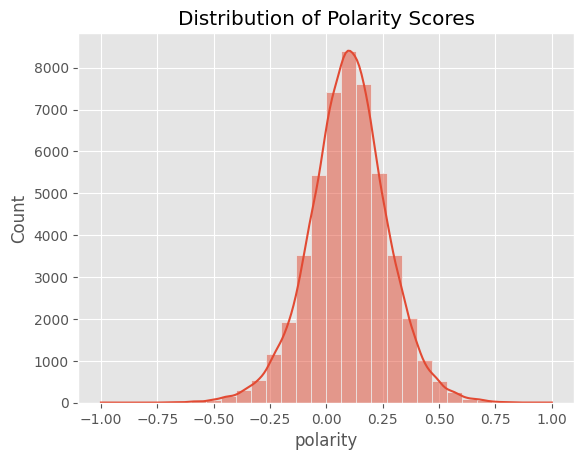

In [137]:
from textblob import TextBlob

def polarity_score(text):
    return TextBlob(text).sentiment.polarity

def subjectivity_score(text):
    return TextBlob(text).sentiment.subjectivity

df['polarity'] = df['review'].apply(polarity_score)
df['subjectivity'] = df['review'].apply(subjectivity_score)

# Visualize polarity scores
sns.histplot(df['polarity'], bins=30, kde=True)
plt.title("Distribution of Polarity Scores")
plt.show()


### Confusion Matrix and Classification Report
The confusion matrix and classification report are displayed below to evaluate the performance of the Support Vector Classifier (SVC) on the test data.


In [138]:
print(confusion_matrix(y_test, svc_pred))

print("\n")

print(classification_report(y_test, svc_pred))

[[6788  725]
 [ 850 6511]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.90      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



# Sentiment Analysis with TextBlob and SVM

This script uses **TextBlob** for polarity-based sentiment analysis and a **Support Vector Classifier (SVC)** model for predicting sentiment as either positive or negative. The polarity score, visualized through a bar plot, indicates the sentiment strength of the input text.


Please enter a sentence for sentiment analysis:  it is a good movie


The sentiment of the given sentence is: Positive


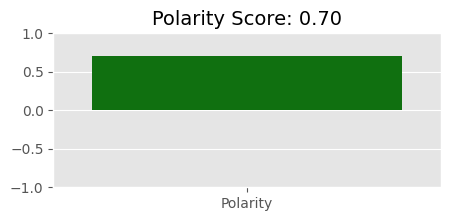

Polarity of the given sentence: 0.70


In [141]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a trained model and vectorizer loaded (svc, vect)

def predict_sentiment(input_text, model, vectorizer):
    # Assuming you have a data_processing function, if not, remove or modify it
    # input_text = data_processing(input_text)  # Comment this out or define it
    
    input_text_vectorized = vectorizer.transform([input_text])
    
    prediction = model.predict(input_text_vectorized)[0]
    
    sentiment_labels = {
        1: "Positive",
        2: "Negative"
    }
    
    return sentiment_labels.get(prediction, "Unknown")  # Added safeguard for prediction key


def analyze_polarity(input_text):
    polarity = TextBlob(input_text).sentiment.polarity
    
    if polarity > 0:
        color = "green"  
    elif polarity < 0:
        color = "red"  
    else:
        color = "gray"  
    
    plt.figure(figsize=(5, 2))
    sns.barplot(x=["Polarity"], y=[polarity], palette=[color])
    plt.ylim(-1, 1)
    plt.title(f"Polarity Score: {polarity:.2f}", fontsize=14)
    plt.show()
    
    return polarity

input_sentence = input("Please enter a sentence for sentiment analysis: ")

# Predict sentiment
predicted_sentiment = predict_sentiment(input_sentence, svc, vect)
print(f"The sentiment of the given sentence is: {predicted_sentiment}")

# Analyze polarity
polarity_score = analyze_polarity(input_sentence)
print(f"Polarity of the given sentence: {polarity_score:.2f}")


# Saving Trained Model and Vectorizer using Pickle


In [ ]:
import pickle

# Assuming you have trained your model and vectorizer
# For example:
# svc = LinearSVC()
# vect = TfidfVectorizer()

# Save the trained model
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(svc, f)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vect, f)
